# 4. Numpy implementation

__Monitor the loss value__

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


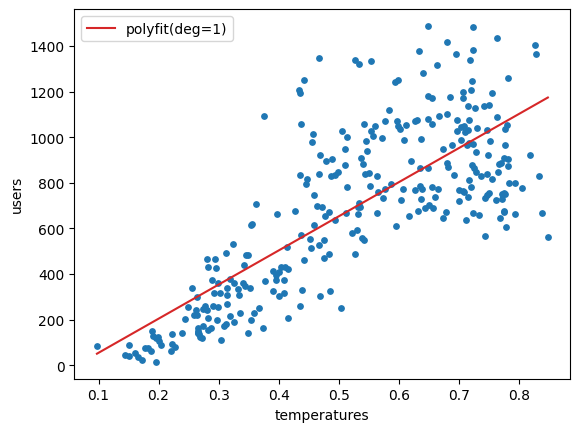

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Linear regression using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# Plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")
plt.xlabel("temperatures")
plt.ylabel("users")
plt.legend()
plt.show()

Let’s implement the algorithm using the code from the previous unit. This time, we will track the value of the root mean squared error (RMSE) function at each iteration. 

In [3]:
# Root mean squared error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [4]:
# Initialization
lr = 0.7  # learning rate
a, b = 0, 0
n_steps = 30

In [10]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a * x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2 * np.mean(x * error)

    # Partial derivative with respect to b
    b_grad = -2 * np.mean(error)

    # Update a and b
    a -= lr * a_grad
    b -= lr * b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

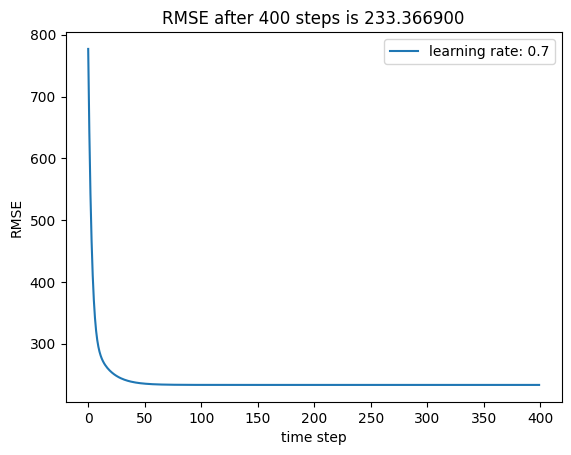

In [11]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {:.6f}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [12]:
a_polyfit, b_polyfit = np.polyfit(x, y, 1)

# Optimal parameters vs. ones obtained with GD
print("Polyfit (a, b)=          ({:.2f}, {:.2f})".format(a_polyfit, b_polyfit))
print("Gradient descent (a, b)= ({:.2f}, {:.2f})".format(a, b))

Polyfit (a, b)=          (1495.60, -94.61)
Gradient descent (a, b)= (1495.60, -94.61)


We can see that the values are far from the optimal ones. The slope is 1133.56 instead of 1495.6, and the intercept term is 98.91 instead of -94.61.

Let’s try to increase the number of steps to 400 instead of 30. We can now rerun the algorithm with these new values.

In [8]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400  # increase to 400

# 5. Issue with the gradient

In [13]:
import pandas as pd

# Load the data
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


Let’s do a simple experiment. Instead of applying gradient descent with these rescaled temperatures, let’s use the original values in degree Celsius. To compute them, we can simply reverse to formula from above.

In [14]:
# Create x/y arrays
x = 47 * data_df.temp.values - 8  # Degrees Celsius
y = data_df.users.values

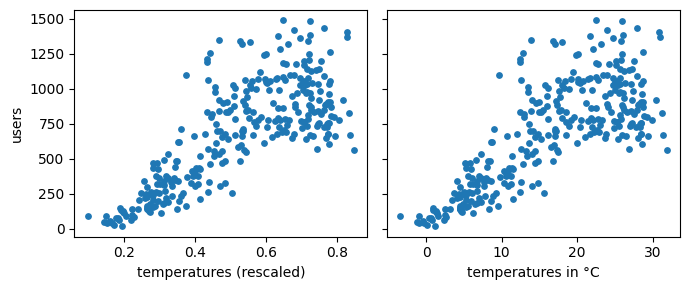

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Compare the two version
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
ax1.scatter(data_df.temp, y, s=15)
ax1.set_xlabel("temperatures (rescaled)")
ax1.set_ylabel("users")
ax2.scatter(x, y, s=15)
ax2.set_xlabel("temperatures in °C")
plt.tight_layout()
plt.show()

In [16]:
import numpy as np

# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Root mean square error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))


# Gradient descent
log_rmse = []
for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log RMSE score
    log_rmse.append(rmse(y, y_pred))

/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_23604/1333192532.py:10: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.mean(np.square(y - y_pred)))
/tmp/ipykernel_23604/1333192532.py:19: RuntimeWarning: overflow encountered in multiply
  a_grad = -2 * np.mean(x * error)
/tmp/ipykernel_23604/1333192532.py:17: RuntimeWarning: invalid value encountered in add
  y_pred = a * x + b


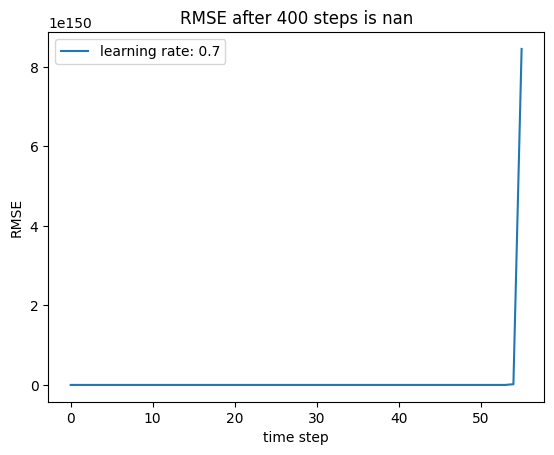

In [17]:
# Plot RMSE values
plt.plot(log_rmse, label="learning rate: {}".format(lr))
plt.title("RMSE after {} steps is {}".format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

__Gradient descent step by step__

In [18]:
# Create x/y arrays
x = data_df.temp.values
y = data_df.users.values

In [19]:
# Initialization
lr = 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x + b
    error = y - y_pred
    a_grad = -2 * np.mean(x * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

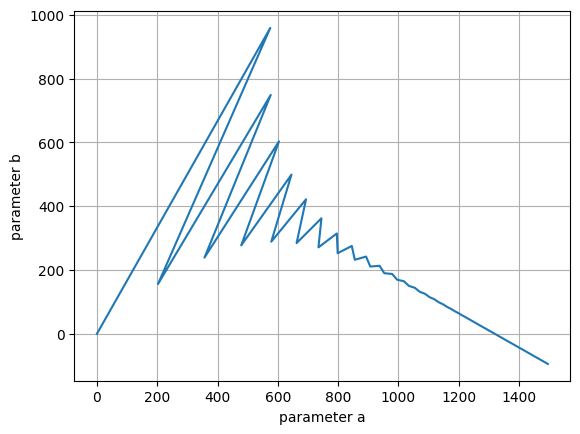

In [20]:
# Visualize steps
plt.plot(log_a, log_b)
plt.grid()
plt.xlabel("parameter a")
plt.ylabel("parameter b")
plt.show()

In [22]:
# Plot the error surface
def visualize_steps(fig, axis, log_a, log_b, x, y):
    # Define a grid of a,b parameters
    min_ab = min(min(log_a), min(log_b))
    max_ab = max(max(log_a), max(log_b))

    d = max_ab - min_ab
    min_ab -= d * 0.1
    max_ab += d * 0.1

    a = np.linspace(min_ab, max_ab, num=40)
    b = np.linspace(min_ab, max_ab, num=40)
    a_grid, b_grid = np.meshgrid(a, b)

    # Compute the RMSE score for each a,b pair on that grid
    rmse_grid = np.zeros_like(a_grid)

    for i in range(40):
        for j in range(40):
            a, b = a_grid[i, j], b_grid[i, j]
            rmse_grid[i, j] = rmse(a * x + b, y)

    # RMSE surface
    axis.set_aspect("equal", adjustable="box")
    mpl_contourset = axis.contourf(a_grid, b_grid, rmse_grid, 20, cmap=plt.cm.coolwarm)
    fig.colorbar(mpl_contourset, ax=axis, label="RMSE")

    # Plot the GD steps
    axis.plot(log_a, log_b, c="#00abe9")
    axis.scatter(log_a, log_b, c="#00abe9")

    # Set titles and labels
    axis.set_xlabel("parameter a")
    axis.set_ylabel("parameter b")

    axis.set_xlim(min_ab, max_ab)
    axis.set_ylim(min_ab, max_ab)

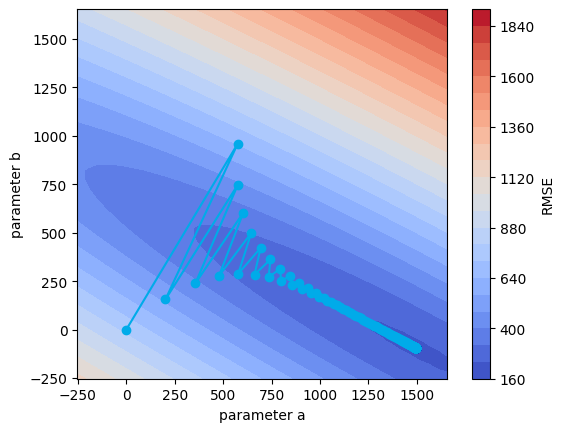

In [23]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x, y)

__Summary__

Let’s summarize what we’ve learned in this unit. Here are a few takeaways.

- The direction of the steepest descent isn’t necessarily the direction of the optimal solution.
- For this reason, gradient descent is sensitive to the scale of the features.

In the next unit, we will see how to solve the issue with standardization.

# 6. Standardization

__Standardize temperatures__

In [25]:
from sklearn.preprocessing import scale

# Standardize x
x_standardized = scale(x)

print("Mean:", x_standardized.mean())
print("Standard deviation:", x_standardized.std())

Mean: -7.058371547285764e-17
Standard deviation: 1.0


In [32]:
# Initialization
lr = 0.1 # 0.1 or 0.7
a, b = 0, 0
n_steps = 400

# Gradient descent
log_a = [a]
log_b = [b]

for step in range(n_steps):
    # Compute partial derivatives
    y_pred = a * x_standardized + b
    error = y - y_pred
    a_grad = -2 * np.mean(x_standardized * error)
    b_grad = -2 * np.mean(error)

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    # Log a, b values
    log_a.append(a)
    log_b.append(b)

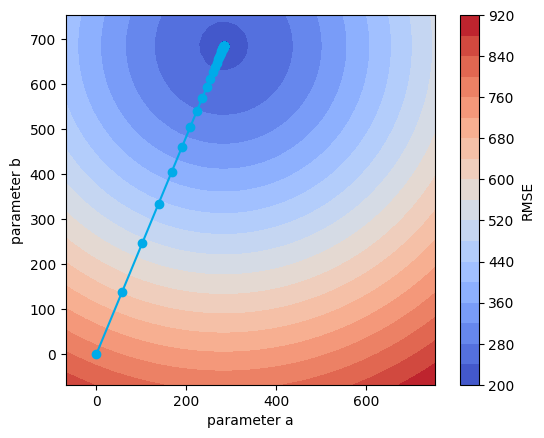

In [33]:
# Plot the error surface
fig = plt.figure()
visualize_steps(fig, fig.gca(), log_a, log_b, x_standardized, y)

# 8. Exercise - Gradient descent

In [34]:
import pandas as pd
import os

# Load train/test data
train_df = pd.read_csv("c3_bike-train.csv")
test_df = pd.read_csv("c3_bike-test.csv")
train_df.head()

,temp,temp_C,hum,windspeed,atemp,atemp_C,yr,workingday,holiday,casual
0,0.368,9.296,0.569,0.148,0.379,9.014,1,1,0,1603
1,0.700,24.900,0.761,0.084,0.660,27.560,0,1,0,768
2,0.282,5.254,0.538,0.187,0.282,2.612,0,0,0,424
3,0.335,7.745,0.450,0.308,0.320,5.120,0,1,0,231
4,0.398,10.706,0.466,0.290,0.388,9.608,1,1,0,663


In [35]:
# Create input matrices and output vectors
X_tr = train_df.drop("casual", axis=1).values
y_tr = train_df.casual.values

X_te = test_df.drop("casual", axis=1).values
y_te = test_df.casual.values

In [36]:
import numpy as np

# Implement RMSE
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [37]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression using OLS
lr = LinearRegression()  # Create object
lr.fit(X_tr, y_tr)  # Fit it to train data

# Evaluate model
y_pred_tr = lr.predict(X_tr)  # Train data
lr_rmse_tr = rmse(y_tr, y_pred_tr)

y_pred_te = lr.predict(X_te)  # Test data
lr_rmse_te = rmse(y_te, y_pred_te)

print("Linear regression (OLS) - train RMSE: {:.2f}".format(lr_rmse_tr))
print("Linear regression (OLS) - test RMSE: {:.2f}".format(lr_rmse_te))

Linear regression (OLS) - train RMSE: 397.42
Linear regression (OLS) - test RMSE: 388.67


 Standardize the features using the train data, i.e., train mean and standard deviation. Fit a linear regression to the train data with gradient descent and evaluate its performance on the test data.


In [38]:
# Standardize features using train mean and standard deviation
X_tr_stand = (X_tr - X_tr.mean(axis=0)) / X_tr.std(axis=0)
X_te_stand = (X_te - X_tr.mean(axis=0)) / X_tr.std(axis=0)

In [39]:
# Add column of ones
X_tr_stand1 = np.c_[np.ones(X_tr_stand.shape[0]), X_tr_stand]
X_te_stand1 = np.c_[np.ones(X_te_stand.shape[0]), X_te_stand]

In [40]:
# Implement gradient descent
def gd(X, y, lr, n_steps):
    # Initialize vector of parameters
    w = np.zeros(X.shape[1])

    # Log RMSE at each step
    log_rmse = []

    # Perform n_steps iterations
    for step in range(n_steps):
        # Compute the predictions
        y_pred = np.matmul(X, w)

        # Gradient for linear regression with MSE
        error = y - y_pred
        gradient = -2 * np.matmul(X.T, error) / X.shape[0]

        # Update the vector of parameters
        w -= lr * gradient

        # Log RMSE value
        log_rmse.append(rmse(y, y_pred))

    # Return vector of parameters and last RMSE value
    return w, log_rmse[-1]


# Fit linear regression
w, gd_rmse_tr = gd(X_tr_stand1, y_tr, lr=0.1, n_steps=500)

# Evaluate model
y_pred_te = np.matmul(X_te_stand1, w)
gd_rmse_te = rmse(y_te, y_pred_te)

print("Linear regression (GD) - train RMSE: {:.2f}".format(gd_rmse_tr))
print("Linear regression (GD) - test RMSE: {:.2f}".format(gd_rmse_te))

Linear regression (GD) - train RMSE: 397.42
Linear regression (GD) - test RMSE: 388.47
